# Omniglot dataset

This notebook is the second part of the paper ["Siamese Neural Networks for One-shot Image Recognition"](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf) coded with PyTorch framework. 

This part presents Omniglot dataset and setups a dataflow for the verification task (training of the siamese networks).

References:
- [paper](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf)
- [omniglot](https://github.com/brendenlake/omniglot)
- [keras-oneshot](https://github.com/sorenbouma/keras-oneshot)

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import cv2

In [3]:
sys.path.append("..")

## Omniglot dataset

This dataset contains 1623 different handwritten characters from 50 different alphabets.
Each of the 1623 characters was drawn online via Amazon's Mechanical Turk by 20 different people.

In [4]:
OMNIGLOT_REPO_PATH='omniglot'

In [5]:
# !unzip --help 

if OMNIGLOT_REPO_PATH is None or not os.path.exists(OMNIGLOT_REPO_PATH):
    OMNIGLOT_REPO_PATH = "omniglot"
    !git clone https://github.com/brendenlake/omniglot
    !cd {os.path.join(OMNIGLOT_REPO_PATH, "python")} && unzip images_background.zip        
    !cd {os.path.join(OMNIGLOT_REPO_PATH, "python")} && unzip images_evaluation.zip

In [6]:
TRAIN_DATA_PATH = os.path.join(OMNIGLOT_REPO_PATH, 'python', 'images_background')
train_alphabets = !ls {TRAIN_DATA_PATH}
train_alphabets = list(train_alphabets)
print("\nTrain alphabets: \n", train_alphabets, len(train_alphabets))

TEST_DATA_PATH = os.path.join(OMNIGLOT_REPO_PATH, 'python', 'images_evaluation')
test_alphabets = !ls {TEST_DATA_PATH}
test_alphabets = list(test_alphabets)
print("\nEvaluation alphabets: \n", test_alphabets, len(test_alphabets))


Train alphabets: 
 ['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit', 'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh'] 30

Evaluation alphabets: 
 ['Angelic', 'Atemayar_Qelisayer', 'Atlantean', 'Aurek-Besh', 'Avesta', 'Ge_ez', 'Glagolitic', 'Gurmukhi', 'Kannada', 'Keble', 'Malayalam', 'Manipuri', 'Mongolian', 'Old_Church_Slavonic_(Cyrillic)', 'Oriya', 'Sylheti', 'Syriac_(Serto)', 'Tengwar', 'Tibetan', 'ULOG'] 20


In [7]:
train_alphabet_char_id_drawer_ids = {}
for a in train_alphabets:
    res = !ls "{os.path.join(TRAIN_DATA_PATH, a)}"
    char_ids = list(res)
    train_alphabet_char_id_drawer_ids[a] = {}
    for char_id in char_ids:
        res = !ls "{os.path.join(TRAIN_DATA_PATH, a, char_id)}"
        train_alphabet_char_id_drawer_ids[a][char_id] = [_id[:-4] for _id in list(res)]

In [8]:
test_alphabet_char_id_drawer_ids = {}
for a in test_alphabets:
    res = !ls "{os.path.join(TEST_DATA_PATH, a)}"
    char_ids = list(res)
    test_alphabet_char_id_drawer_ids[a] = {}
    for char_id in char_ids:
        res = !ls "{os.path.join(TEST_DATA_PATH, a, char_id)}"
        test_alphabet_char_id_drawer_ids[a][char_id] = [_id[:-4] for _id in list(res)]

In [9]:
print("Characters of 'Alphabet_of_the_Magi': \n", train_alphabet_char_id_drawer_ids['Alphabet_of_the_Magi'].keys())

Characters of 'Alphabet_of_the_Magi': 
 dict_keys(['character05', 'character15', 'character07', 'character04', 'character10', 'character03', 'character06', 'character17', 'character13', 'character02', 'character19', 'character12', 'character01', 'character18', 'character20', 'character08', 'character11', 'character09', 'character14', 'character16'])


In [10]:
print("Images of a single character of 'Alphabet_of_the_Magi': \n", 
      train_alphabet_char_id_drawer_ids['Alphabet_of_the_Magi']['character01'])

Images of a single character of 'Alphabet_of_the_Magi': 
 ['0709_01', '0709_02', '0709_03', '0709_04', '0709_05', '0709_06', '0709_07', '0709_08', '0709_09', '0709_10', '0709_11', '0709_12', '0709_13', '0709_14', '0709_15', '0709_16', '0709_17', '0709_18', '0709_19', '0709_20']


In [11]:
def get_image(group, char_id, _id, _type="Train"):    
    assert _type in ["Train", "Test"]
    path = TRAIN_DATA_PATH if _type == "Train" else TEST_DATA_PATH
    path = os.path.join(path, group, char_id, "%s.png" % _id)
    assert os.path.exists(path), "Path '%s' does not exist" % path
    img = cv2.imread(path)
    return img

In [24]:
import matplotlib.pylab as plt
%matplotlib inline

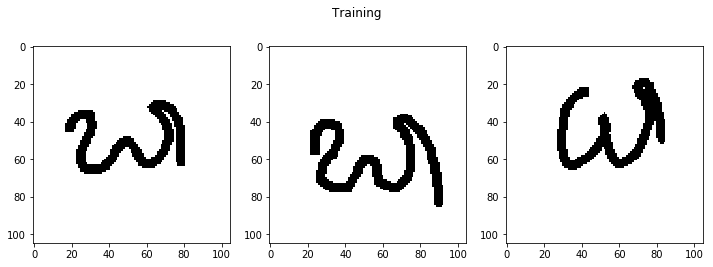

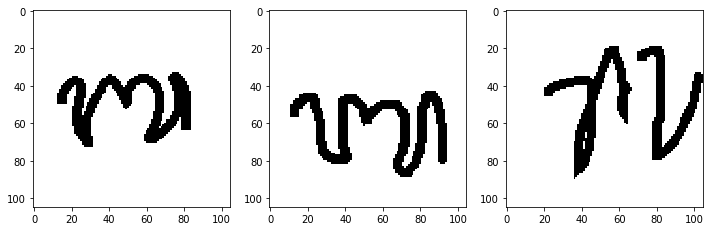

In [19]:
plt.figure(figsize=(12, 4))
plt.suptitle("Training")
plt.subplot(131)
plt.imshow(get_image('Balinese', 'character01', '0108_01'))
plt.subplot(132)
plt.imshow(get_image('Balinese', 'character01', '0108_02'))
plt.subplot(133)
plt.imshow(get_image('Balinese', 'character01', '0108_03'))

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(get_image('Balinese', 'character02', '0109_01'))
plt.subplot(132)
plt.imshow(get_image('Balinese', 'character02', '0109_02'))
plt.subplot(133)
_ = plt.imshow(get_image('Balinese', 'character02', '0109_03'))

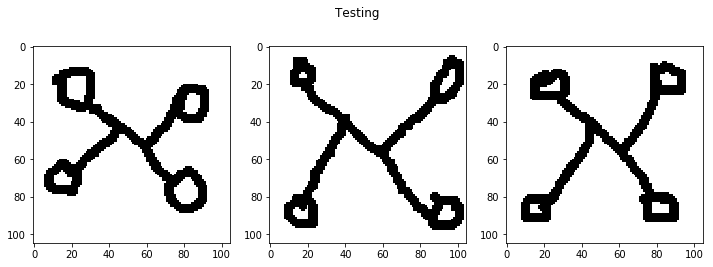

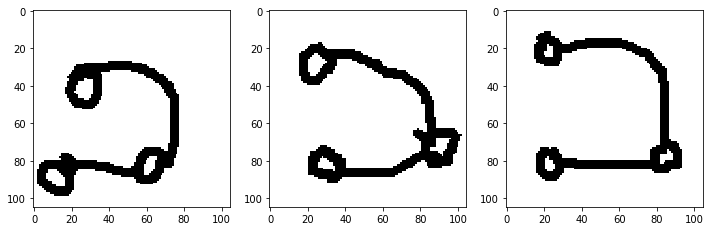

In [20]:
plt.figure(figsize=(12, 4))
plt.suptitle("Testing")
plt.subplot(131)
plt.imshow(get_image('Angelic', 'character01', '0965_01', "Test"))
plt.subplot(132)
plt.imshow(get_image('Angelic', 'character01', '0965_02', "Test"))
plt.subplot(133)
plt.imshow(get_image('Angelic', 'character01', '0965_03', "Test"))

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(get_image('Angelic', 'character02', '0966_01', "Test"))
plt.subplot(132)
plt.imshow(get_image('Angelic', 'character02', '0966_02', "Test"))
plt.subplot(133)
_ = plt.imshow(get_image('Angelic', 'character02', '0966_03', "Test"))

Let's create a dataset usable within PyTorch framework and observe some train/val/test examples

In [12]:
from dataflow import OmniglotDataset
from common_utils.dataflow_visu_utils import display_basic_dataset

In [13]:
train_ds = OmniglotDataset("Train", data_path=TRAIN_DATA_PATH, 
                           alphabet_char_id_drawers_ids=train_alphabet_char_id_drawer_ids)

valtest_ds = OmniglotDataset("Test", data_path=TEST_DATA_PATH, 
                             alphabet_char_id_drawers_ids=test_alphabet_char_id_drawer_ids)

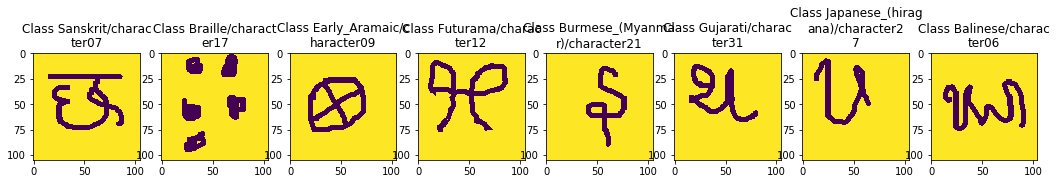

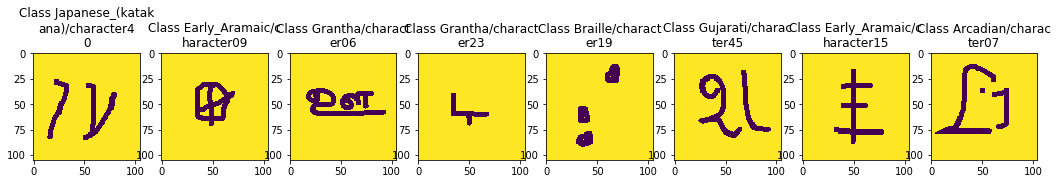

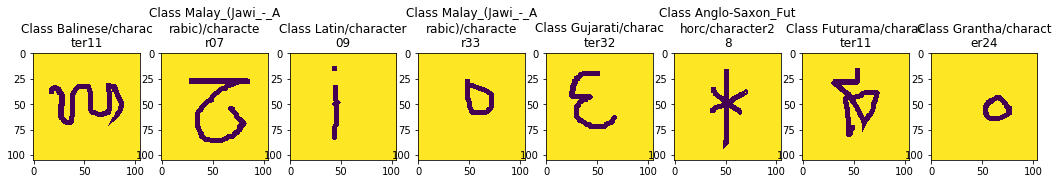

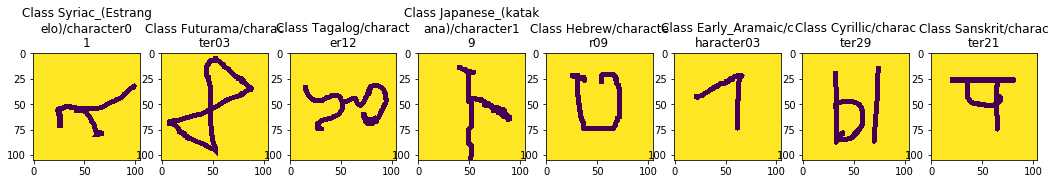

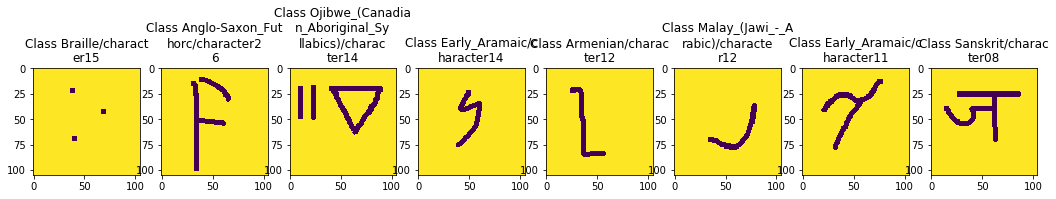

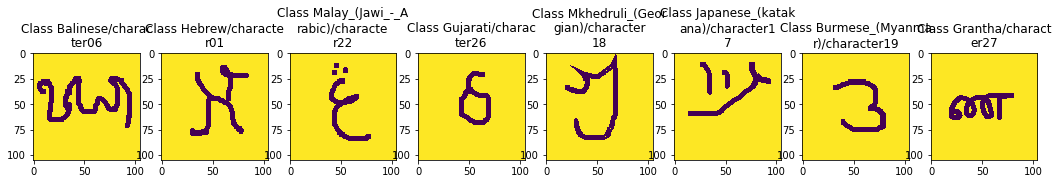

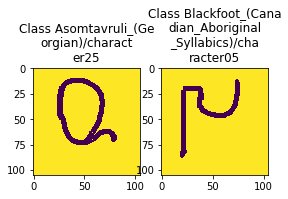

In [39]:
display_basic_dataset(train_ds, max_datapoints=50, n_cols=8, figsize=(18, 4))

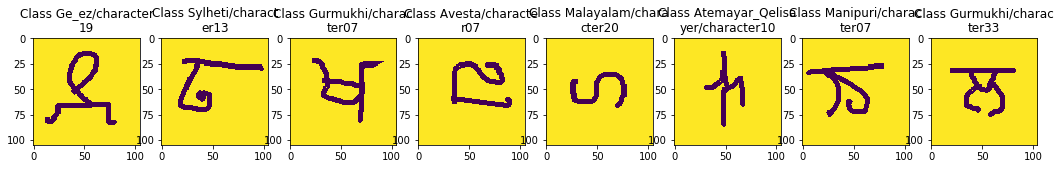

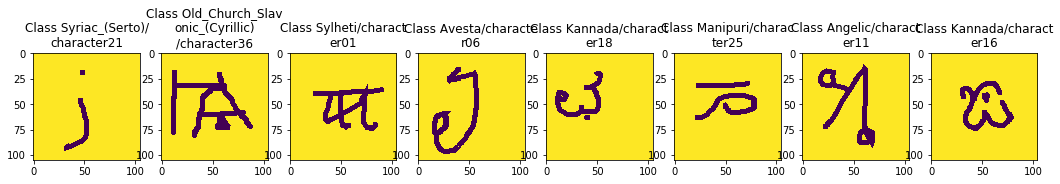

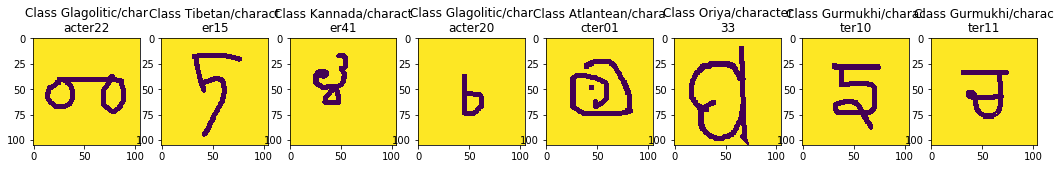

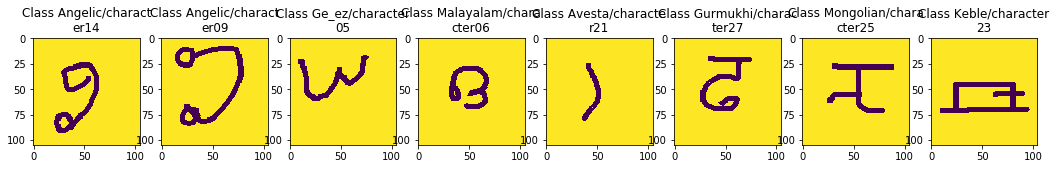

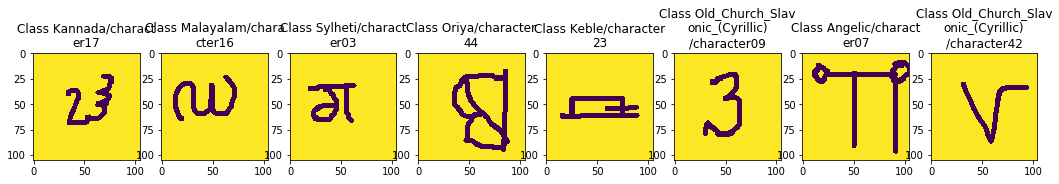

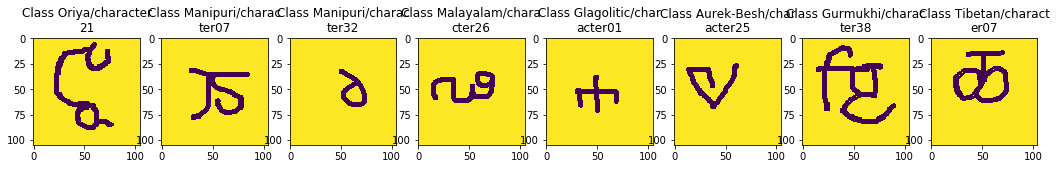

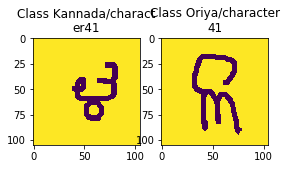

In [40]:
display_basic_dataset(valtest_ds, max_datapoints=50, n_cols=8, figsize=(18, 4))

## Training strategy

- Train network on the verification task
    - identify input pairs according to the probability that they belong to the same or different classes
- Validate model 
    - classification accuracy
    - one-shot learning

### Verification task

Omniglot dataset is used to randomly produce *same* and *different* pairs of images.

#### Dataset splitting:    
- Training:
    - random 30 of 50 alphabets
    - random 12 of 20 drawers     
    - 3 types of training datasets : 
        - 30k of pairs
        - 90k of pairs
        - 150k of pairs    
- Validation:
    - remaining 10 of 20 alphabets
    - remaining 4 of 8 alphabets
    - 10k of pairs
- Testing:
    - remaining 10 of 20 alphabets
    - remaining 4 of 8 alphabets
    - 10k of pairs

In [14]:
np.random.seed(12345)

In [15]:
# Sample 12 drawers out of 20
all_drawers_ids = np.arange(20) 
train_drawers_ids = np.random.choice(all_drawers_ids, size=12, replace=False)
# Sample 4 drawers out of remaining 8
val_drawers_ids = np.random.choice(list(set(all_drawers_ids) - set(train_drawers_ids)), size=4, replace=False)
test_drawers_ids = np.array(list(set(all_drawers_ids) - set(val_drawers_ids) - set(train_drawers_ids)))

def create_str_drawers_ids(drawers_ids):
    return ["_{0:0>2}".format(_id) for _id in drawers_ids]

train_drawers_ids = create_str_drawers_ids(train_drawers_ids)
val_drawers_ids = create_str_drawers_ids(val_drawers_ids)
test_drawers_ids = create_str_drawers_ids(test_drawers_ids)

print(train_drawers_ids)
print(val_drawers_ids)
print(test_drawers_ids)

['_13', '_08', '_16', '_03', '_15', '_12', '_00', '_10', '_07', '_11', '_06', '_17']
['_09', '_18', '_19', '_14']
['_01', '_02', '_04', '_05']


In [16]:
train_ds = OmniglotDataset("Train", data_path=TRAIN_DATA_PATH, 
                           alphabet_char_id_drawers_ids=train_alphabet_char_id_drawer_ids, 
                           drawers_ids=train_drawers_ids)

val_ds = OmniglotDataset("Test", data_path=TEST_DATA_PATH, 
                         alphabet_char_id_drawers_ids=test_alphabet_char_id_drawer_ids, 
                         drawers_ids=val_drawers_ids)

test_ds = OmniglotDataset("Test", data_path=TEST_DATA_PATH, 
                          alphabet_char_id_drawers_ids=test_alphabet_char_id_drawer_ids, 
                          drawers_ids=test_drawers_ids)

In [17]:
len(train_ds), len(val_ds), len(test_ds)

(10604, 2636, 2636)

In [18]:
y_labels = set()
for x, y in train_ds:
    y_labels.add(y)
    
# Number of classes
print("Number of classes in train:", len(y_labels), x.shape)

# number of alphabets:
res = set([y_label.split('/')[0] for y_label in y_labels])
print("Number of alphabets: ", len(res), res)

Number of classes in train: 964 (105, 105, 1)
Number of alphabets:  30 {'Greek', 'Anglo-Saxon_Futhorc', 'Korean', 'Braille', 'Gujarati', 'Early_Aramaic', 'Sanskrit', 'Mkhedruli_(Georgian)', 'Burmese_(Myanmar)', 'Bengali', 'Syriac_(Estrangelo)', 'Hebrew', 'Grantha', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Balinese', 'Arcadian', 'Futurama', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Latin', 'Alphabet_of_the_Magi', 'Japanese_(hiragana)', 'Asomtavruli_(Georgian)', 'N_Ko', 'Armenian', 'Malay_(Jawi_-_Arabic)', 'Tagalog', 'Japanese_(katakana)', 'Tifinagh', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Cyrillic'}


Create pairs

In [26]:
from dataflow import SameOrDifferentPairsDataset
from common_utils.dataflow_visu_utils import _to_ndarray

In [21]:
train_pairs = SameOrDifferentPairsDataset(train_ds, nb_pairs=int(30e3))
val_pairs = SameOrDifferentPairsDataset(val_ds, nb_pairs=int(10e3))
test_pairs = SameOrDifferentPairsDataset(test_ds, nb_pairs=int(10e3))

len(train_pairs), len(val_pairs), len(test_pairs)

(30000, 10000, 10000)

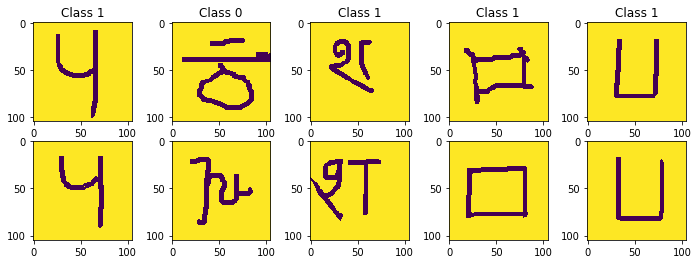

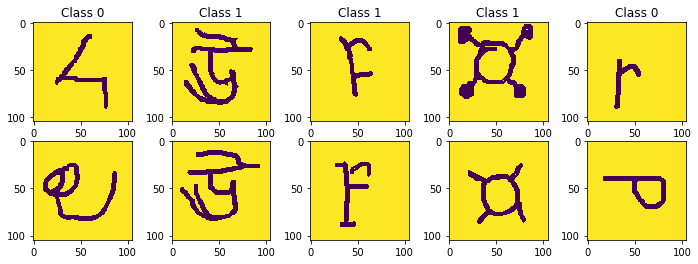

In [28]:
max_datapoints = 10
n_cols = 5
for i, (x1, x2, y) in enumerate(train_pairs):

    if i % n_cols == 0:
        plt.figure(figsize=(12, 4))

    x1 = _to_ndarray(x1)
    x2 = _to_ndarray(x2)    
    plt.subplot(2, n_cols, (i % n_cols) + 1)
    plt.imshow(x1)
    plt.title("Class %i" % y)
    plt.subplot(2, n_cols, (i % n_cols) + 1 + n_cols)
    plt.imshow(x2)

    max_datapoints -= 1
    if max_datapoints == 0:
        break

#### Data augmentations

Random affine transformation with 0.5 probability: 
- rotation: [-10, 10]
- scale: [0.8, 1.2]
- translations: [-2, 2]
- shear: [-0.3, 0.3]

In [33]:
from common_utils.imgaug import RandomAffine, RandomApply
from common_utils.dataflow import TransformedDataset
from torchvision.transforms import Compose, ToTensor, Normalize
from dataflow import PairTransformedDataset

In [31]:
train_data_aug = Compose([
    RandomApply(
        RandomAffine(rotation=(-10, 10), scale=(0.8, 1.2), translate=(-0.05, 0.05)),
        proba=0.5
    ),
    ToTensor()
])

test_data_aug = Compose([
    ToTensor()
])

In [34]:
train_aug_pairs = PairTransformedDataset(train_pairs, x_transforms=train_data_aug)
val_aug_pairs = PairTransformedDataset(val_pairs, x_transforms=test_data_aug)
test_aug_pairs = PairTransformedDataset(test_pairs, x_transforms=test_data_aug)

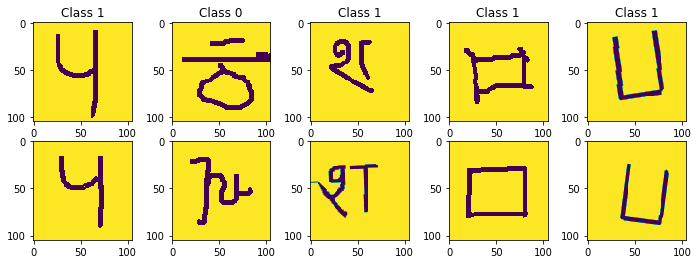

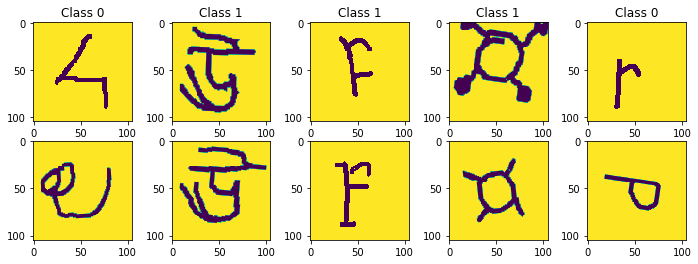

In [35]:
max_datapoints = 10
n_cols = 5
for i, (x1, x2, y) in enumerate(train_aug_pairs):

    if i % n_cols == 0:
        plt.figure(figsize=(12, 4))

    x1 = _to_ndarray(x1)
    x2 = _to_ndarray(x2)    
    plt.subplot(2, n_cols, (i % n_cols) + 1)
    plt.imshow(x1)
    plt.title("Class %i" % y)
    plt.subplot(2, n_cols, (i % n_cols) + 1 + n_cols)
    plt.imshow(x2)

    max_datapoints -= 1
    if max_datapoints == 0:
        break

Batch loader

In [37]:
from torch.utils.data import DataLoader

In [39]:
batch_size = 5
train_batches = DataLoader(train_aug_pairs, batch_size=batch_size, 
                           shuffle=True, num_workers=1, 
                           drop_last=True)

val_batches = DataLoader(val_aug_pairs, batch_size=batch_size, 
                              shuffle=True, num_workers=1,
                              pin_memory=True, drop_last=True)

test_batches = DataLoader(test_aug_pairs, batch_size=batch_size, 
                               shuffle=False, num_workers=1,                   
                               pin_memory=True, drop_last=False)


len(train_batches), len(val_batches), len(test_batches)

(6000, 2000, 2000)

torch.Size([5, 1, 105, 105]) torch.Size([5, 1, 105, 105]) torch.Size([5])
torch.Size([5, 1, 105, 105]) torch.Size([5, 1, 105, 105]) torch.Size([5])
torch.Size([5, 1, 105, 105]) torch.Size([5, 1, 105, 105]) torch.Size([5])
torch.Size([5, 1, 105, 105]) torch.Size([5, 1, 105, 105]) torch.Size([5])
torch.Size([5, 1, 105, 105]) torch.Size([5, 1, 105, 105]) torch.Size([5])


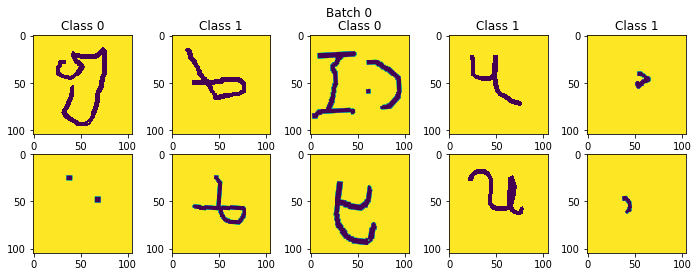

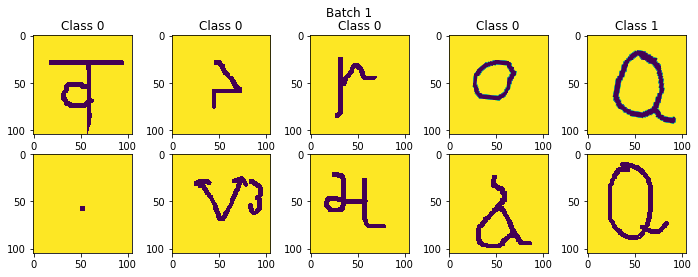

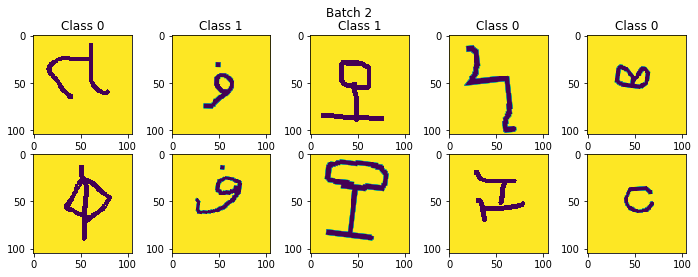

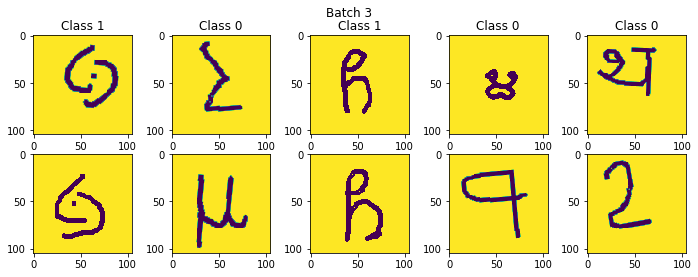

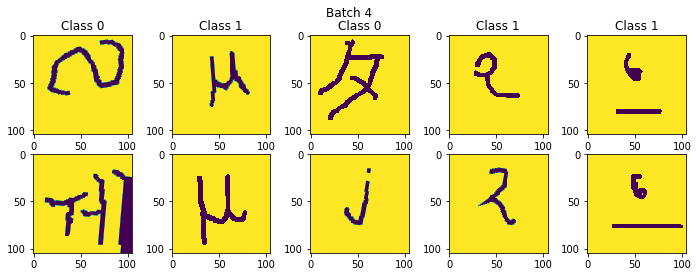

In [41]:
max_datapoints = 5
n_cols = 5
for i, (batch_x1, batch_x2, batch_y) in enumerate(train_batches):

    print(batch_x1.size(), batch_x2.size(), batch_y.size())
    
    plt.figure(figsize=(12, 4))
    plt.suptitle("Batch %i" % i)
    for j in range(len(batch_x1)):
        if j > 0 and j % n_cols == 0:
            plt.figure(figsize=(16, 4))
        
        x1 = batch_x1[j, ...]
        x2 = batch_x2[j, ...]
        y = batch_y[j, ...]
    
        x1 = _to_ndarray(x1)
        x2 = _to_ndarray(x2)    
        plt.subplot(2, n_cols, (j % n_cols) + 1)
        plt.imshow(x1)
        plt.title("Class %i" % y)
        plt.subplot(2, n_cols, (j % n_cols) + 1 + n_cols)
        plt.imshow(x2)

    max_datapoints -= 1
    if max_datapoints == 0:
        break